In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import nn_backprop as nnbp

In [3]:
IMG_DIM = 28
plt.rcParams['image.cmap'] = 'binary'
np.set_printoptions(precision=3)

# Problem 5

### Load data, randomize order, then plot a few examples...

In [4]:
alldata_t = np.loadtxt('./data/digitstrain.txt', delimiter=',')

In [109]:
np.random.seed(42)
np.random.shuffle(alldata_t)

In [110]:
y_t = alldata_t[:,-1].astype(int)
print(y_t.size)
y_t[:100].reshape((10,10))  # Labels...

3000


array([[8, 7, 8, 4, 2, 9, 1, 5, 2, 9],
       [2, 0, 3, 4, 0, 2, 3, 6, 6, 1],
       [5, 1, 7, 9, 0, 8, 7, 9, 2, 9],
       [7, 0, 5, 8, 9, 5, 2, 6, 8, 1],
       [3, 0, 5, 6, 2, 8, 0, 9, 2, 3],
       [0, 7, 8, 9, 3, 3, 1, 7, 2, 1],
       [2, 8, 8, 8, 7, 1, 8, 0, 6, 3],
       [5, 0, 7, 0, 2, 8, 1, 1, 6, 1],
       [1, 5, 4, 5, 8, 7, 8, 0, 9, 8],
       [2, 4, 2, 7, 0, 4, 1, 9, 9, 4]])

784


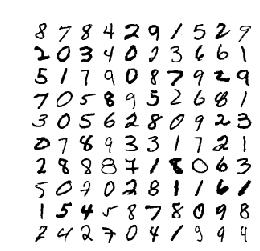

In [111]:
digits_t = alldata_t[:,:-1]
print(digits_t[0].size)
#nnbp.plot_1(digits_t[0])
nnbp.plot_100(digits_t)

## a) Basic Generalization

```
[784] -> [100] -> [10]
dim(W1) = [100, 784]
dim(W2) = [10, 100]

h(0) = X [784] = input
PreAct(1) [100] = W1*h(0) + b1
h(1) [100] = sigmoid(PreAct(1))
PreAct(2) [10] = W2*h(1) + b2
output [10] = softmax(PreAct(2))

```

In [156]:
def sig(x):                                        
    return 1 / (1 + np.exp(-x))

def w_scale(fan_in=100, fan_out=100):
    return 4*np.sqrt(6/(fan_in+fan_out))

def softmax(x):
    """Numerically stable version..."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

def d_sig(x):
    return sig(x)*(1-sig(x))

def binary_vec_plot(vec, title=""):
    plt.matshow(np.matrix(vec), cmap=mpl.cm.binary)
    plt.title(title)
    
def grad_vec_plot(vec, title=""):
    plt.matshow(np.matrix(vec), cmap=mpl.cm.RdBu)
    plt.title(title)


b1 = np.zeros(100)
b2 = np.zeros(10)
                
W1 = np.random.uniform(w_scale(784, 100), -w_scale(784, 100), size=(100,784))
Wout = np.random.uniform(w_scale(100, 10), -w_scale(100, 10), size=(10,100))

In [54]:
print(digits_t.shape)

(3000, 784)


In [55]:
digits_t[0].shape

(784,)

## Forward Pass

In [202]:
h0 = digits_t[n]
# Hidden Layer 1
PreAct1 = W1 @ h0 + b1
h1 = sig(PreAct1)
# Output Layer
PreActOut = Wout @ h1 + b2
output = softmax(PreActOut)

print("Sum: ",sum(output))
output

ValueError: shapes (10,100) and (1,100) not aligned: 100 (dim 1) != 1 (dim 0)

## Backpropagation Implementation

In [58]:
rate = 0.1

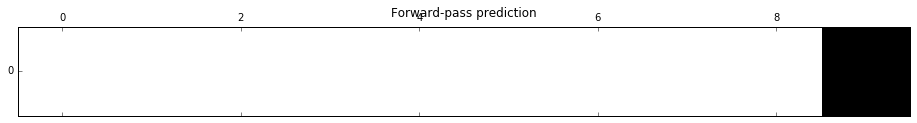

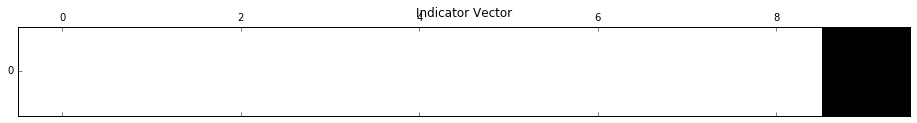

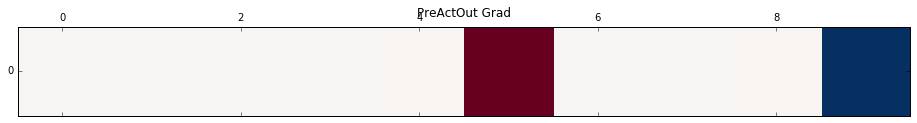

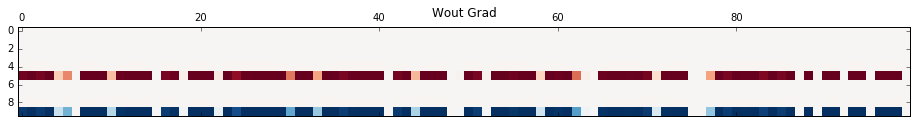

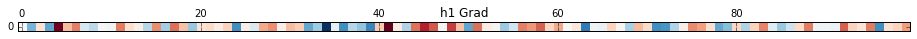

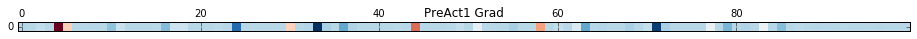

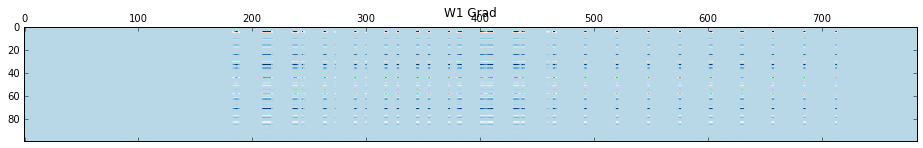

In [201]:
# Output of network 
binary_vec_plot(output, "Forward-pass prediction")

# True value
indicator_vector = np.zeros(10)
indicator_vector[y_t[n]] = 1  # Set 
indicator_vector
binary_vec_plot(indicator_vector, "Indicator Vector")

#### Start output layer
# Resulting gradient at lowest level (inverse sign from notes)
PreActOut_grad = (indicator_vector - output)  # [10]
# How much cost will change per pre-activation (at X)
grad_vec_plot(PreActOut_grad, "PreActOut Grad")

# connection weight deltas
b2_grad = PreActOut_grad
Wout_grad = np.array(np.matrix(PreActOut_grad).T @ np.matrix(h1))     # [10,100]
grad_vec_plot(Wout_grad, "Wout Grad")

# Apply updates
b2 = b2 - rate*b2_grad
Wout = Wout - rate*Wout_grad
#### End Output Layer

#### Start hidden layer 1
# How much cost will change per hidden unit activation value
h1_grad = Wout.T @ PreActOut_grad  # [100]
grad_vec_plot(h1_grad, "h1 Grad")

PreAct1_grad = np.multiply(h1_grad,d_sig(PreAct1)) # Element-wise multiplication
grad_vec_plot(PreAct1_grad, "PreAct1 Grad")

b1_grad = PreAct1_grad
W1_grad = np.matrix(PreAct1_grad).T @ np.matrix(h0)
grad_vec_plot(W1_grad, "W1 Grad")

# Apply updates
b1 = b1 - rate*b1_grad
W1 = W1 - rate*W1_grad
#### End hidden layer 1


#### Weight matricies

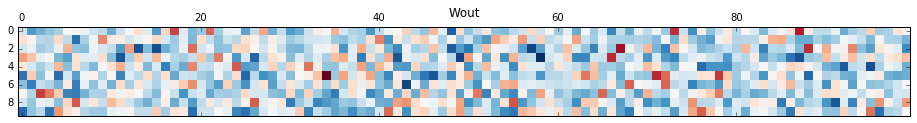

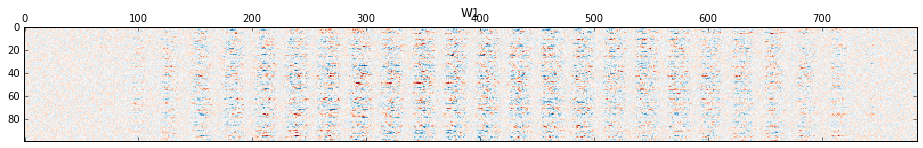

In [200]:
grad_vec_plot(Wout, "Wout")

grad_vec_plot(W1, "W1")

## Training

In [153]:
output

array([ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan])

In [78]:
indicator_vector

array([ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.])

In [149]:
np.log(output)

array([ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan])

nan

In [212]:
outputs = []
cross_entropy_errors = [0]
cross_entropy_per_epoch = []

rate = 0.1
b1 = np.zeros(100)
b2 = np.zeros(10)
W1 = np.random.uniform(w_scale(784, 100), -w_scale(784, 100), size=(100,784))
Wout = np.random.uniform(w_scale(100, 10), -w_scale(100, 10), size=(10,100))

for epoch in range(200):
    for n in range(len(digits_t)):
        ###### Forward Pass
        h0 = digits_t[n]
        # Hidden Layer 1
        PreAct1 = W1 @ h0 + b1
        h1 = sig(PreAct1)
        # Output Layer

        PreActOut = Wout @ h1 + b2
        output = softmax(PreActOut)

        # Backward Pass
        # Output of network 

        # True value
        indicator_vector = np.zeros(10)
        indicator_vector[y_t[n]] = 1  # Set  
        outputs.append(indicator_vector)


        cross_entropy_errors.append(np.sum(-np.multiply(np.log(output),indicator_vector)))

        #### Start output layer
        # Resulting gradient at lowest level (inverse sign from notes)
        PreActOut_grad = (indicator_vector - output)  # [10]
        # How much cost will change per pre-activation (at X)

        # connection weight deltas
        b2_grad = PreActOut_grad
        Wout_grad = np.array(np.matrix(PreActOut_grad).T @ np.matrix(h1))     # [10,100]

        # Apply updates

        b2 = b2 + rate*b2_grad
        Wout = Wout + rate*Wout_grad
        #### End Output Layer

        #### Start hidden layer 1
        # How much cost will change per hidden unit activation value
        h1_grad = Wout.T @ PreActOut_grad  # [100]
        PreAct1_grad = np.multiply(h1_grad,d_sig(PreAct1)) # Element-wise multiplication

        b1_grad = PreAct1_grad
        W1_grad = np.matrix(PreAct1_grad).T @ np.matrix(h0)
        # Apply updates
        b1 = b1 + rate*b1_grad
        W1 = W1 + rate*np.array(W1_grad)
        #### End hidden layer 1
    
    cross_entropy_per_epoch.append(np.average(cross_entropy_errors))
    cross_entropy_errors = []

c:\Anaconda3\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


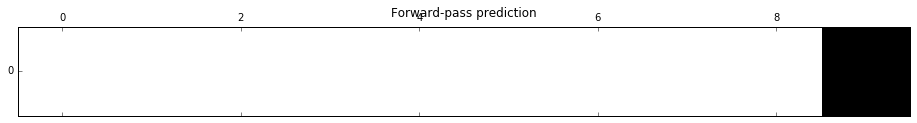

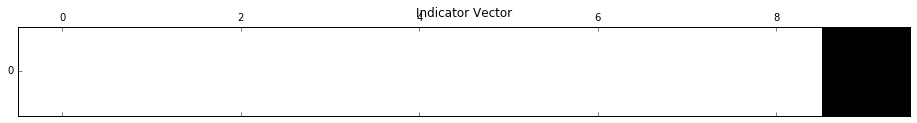

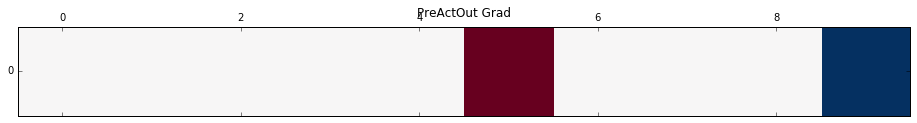

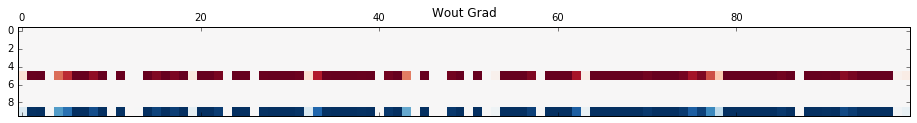

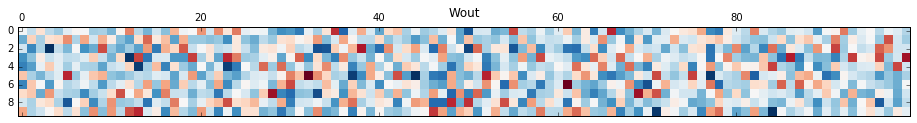

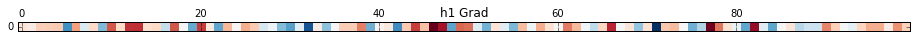

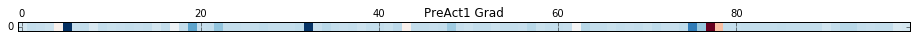

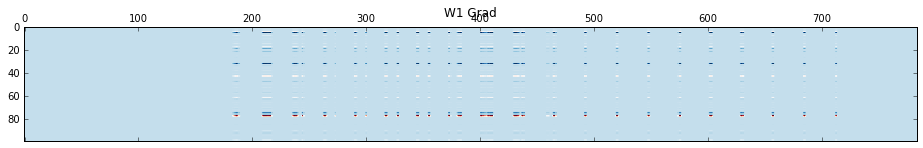

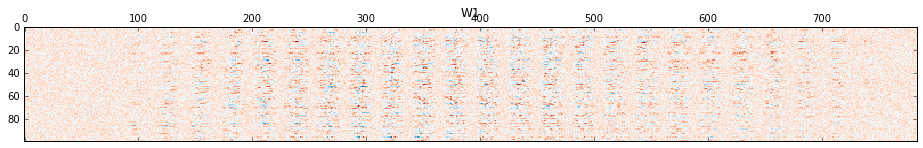

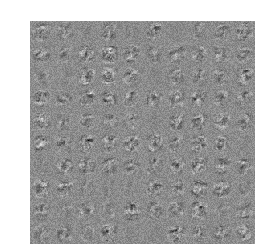

In [219]:
# Output of network 
binary_vec_plot(output, "Forward-pass prediction")
binary_vec_plot(indicator_vector, "Indicator Vector")
grad_vec_plot(PreActOut_grad, "PreActOut Grad")
grad_vec_plot(Wout_grad, "Wout Grad")
grad_vec_plot(Wout, "Wout")
grad_vec_plot(h1_grad, "h1 Grad")
grad_vec_plot(PreAct1_grad, "PreAct1 Grad")
grad_vec_plot(W1_grad, "W1 Grad")
grad_vec_plot(W1, "W1")
nnbp.plot_100(W1)

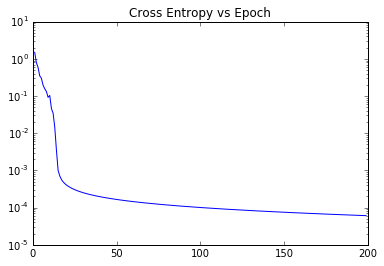

In [221]:
plt.plot(cross_entropy_per_epoch)
plt.gca().set_yscale('log')
plt.title("Cross Entropy vs Epoch")
plt.savefig('5a_crossentropy_vs_epoch.png')

In [235]:
result = nnbp.train_singlelayer(epochs=10, seed=20)

In [234]:
result['ce_per_epoch']

[1.4720589584201711,
 0.80326986585642801,
 0.53687082066707348,
 0.35951135629541953,
 0.27207065952992709,
 0.20560165201470892,
 0.16386455443153358,
 0.12559661964630611,
 0.099720126688395833,
 0.068529650234300965]

In [233]:
result['ce_per_epoch']

[1.4720589584201711,
 0.80326986585642801,
 0.53687082066707348,
 0.35951135629541953,
 0.27207065952992709,
 0.20560165201470892,
 0.16386455443153358,
 0.12559661964630611,
 0.099720126688395833,
 0.068529650234300965]

In [229]:
result['ce_per_epoch']

[1.4720589584201711,
 0.80326986585642801,
 0.53687082066707348,
 0.35951135629541953,
 0.27207065952992709]